# Import the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# LOAD DATA
train_pro = pd.read_csv("train_proteins.csv")
train_pep= pd.read_csv("train_peptides.csv")
train_clin = pd.read_csv("train_clinical_data.csv")

# VISUALIZE DATA TO JOIN DATA
.head() , .describe(), .info(), .shape()

In [3]:
print(train_pro.shape)
print(train_pep.shape)
print(train_clin.shape)

(232741, 5)
(981834, 6)
(2615, 8)


In [4]:
# different amount of columns, thus need to find similarities and differences bfr making a MERGE
print(train_pro.head())
print(train_pep.head())
print(train_clin.head())

  visit_id  visit_month  patient_id UniProt       NPX
0     55_0            0          55  O00391   11254.3
1     55_0            0          55  O00533  732430.0
2     55_0            0          55  O00584   39585.8
3     55_0            0          55  O14498   41526.9
4     55_0            0          55  O14773   31238.0
  visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance  
0                           NEQEQPLGQWHLS           11254.3  
1                             GNPEPTFSWTK          102060.0  
2                         IEIPSSVQQVPTIIK          174185.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  
4                            SMEQNGPGLEYR           30838.7  
  visit_id  patient_i

# Prepare to Data to Merge
Remove Redundant Values

In [5]:
#All have: Visit ID, visit MONTH, Patient ID, 
#BUT NOT : UNI PROT, NPX, PEPTIDE, PEPTIDE ABUNDANCE, UPDRS1-4, ON MEDICATION
#WANT: Visit ID, NPX, PEPTIDE ABUNDANCE,UPDRS1-4

#REWORK
 #Visit id is redundant

In [6]:
#Clean Data To Merge Data
# Drop Visit_ID since it does not contribute to data processing because it is redudant

pro_Cond1= train_pro.drop("visit_id", axis=1 )


pep_Cond1= train_pep.drop("visit_id", axis=1 )
clin_Cond1= train_clin.drop("visit_id", axis=1 )






In [7]:
pro_Cond1.head()

,visit_month,patient_id,UniProt,NPX
0,0,55,O00391,11254.3
1,0,55,O00533,732430.0
2,0,55,O00584,39585.8
3,0,55,O14498,41526.9
4,0,55,O14773,31238.0


In [8]:
pep_Cond1.head()

,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,0,55,O00533,GNPEPTFSWTK,102060.0
2,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,0,55,O00533,SMEQNGPGLEYR,30838.7


In [9]:
pro_Cond1= pro_Cond1.drop("visit_month", axis=1 )

In [10]:
#MERGE(JOIN)DATA Part 1
Pro_pep_Cond1=pro_Cond1.merge(pep_Cond1, on =["patient_id",'UniProt'])
Pro_pep_Cond1.head()

,patient_id,UniProt,NPX,visit_month,Peptide,PeptideAbundance
0,55,O00391,11254.3,0,NEQEQPLGQWHLS,11254.3
1,55,O00391,11254.3,6,NEQEQPLGQWHLS,13163.6
2,55,O00391,11254.3,12,NEQEQPLGQWHLS,15257.6
3,55,O00391,11254.3,36,NEQEQPLGQWHLS,13530.8
4,55,O00391,13163.6,0,NEQEQPLGQWHLS,11254.3


In [12]:
clin_Cond1.head()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55,0,10.0,6.0,15.0,NaN,NaN
1,55,3,10.0,7.0,25.0,NaN,NaN
2,55,6,8.0,10.0,34.0,NaN,NaN
3,55,9,8.0,9.0,30.0,0.0,On
4,55,12,10.0,10.0,41.0,0.0,On


In [14]:
#CLEAN and THEN merge
Pro_pep_Cond1= Pro_pep_Cond1.drop("visit_month", axis=1 )


In [15]:
#MERGE(JOIN)DATA Part 2
Pro_pep_clin= Pro_pep_Cond1.merge(train_clin, on =["patient_id" ])


In [16]:
Pro_pep_clin.head()

,patient_id,UniProt,NPX,Peptide,PeptideAbundance,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_0,0,10.0,6.0,15.0,NaN,NaN
1,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_3,3,10.0,7.0,25.0,NaN,NaN
2,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_6,6,8.0,10.0,34.0,NaN,NaN
3,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_9,9,8.0,9.0,30.0,0.0,On
4,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_12,12,10.0,10.0,41.0,0.0,On


# Clean the Merged Data

In [20]:
Pro_pep_clin["visit_month"].unique()

array([  0,   3,   6,   9,  12,  18,  24,  30,  36,  42,  48,  54,  60,
        72,  84,  96, 108], dtype=int64)

Months are being counted in increments of 3

In [21]:
Pro_pep_clin["patient_id"].unique()


array([   55,  1517,  1923,  2660,  3636,  3863,  4161,  4172,  5027,
        5178,  5645,  5742,  6054,  6211,  7051,  7117,  7568,  7832,
        8699, 10053, 10174, 10541, 10715, 10718, 11459, 11686, 11928,
       12516, 12636, 12703, 12755, 13368, 13618, 13968, 14035, 14124,
       14242, 14450, 14811, 15009, 15504, 15590, 16238, 16347, 16566,
       16574, 17154, 17414, 17727, 18183, 18204, 18553, 18560, 19088,
       20212, 20216, 20352, 20404, 20664, 20791, 21126, 21537, 21729,
       22126, 22623, 23192, 23244, 23391, 23636, 24278, 24690, 24820,
       24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210,
       26809, 27079, 27300, 27464, 27468, 27715, 27971, 28327, 28342,
       28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121,
       31154, 31693, 33548, 33558, 34182, 35231, 35465, 35477, 35675,
       35696, 36797, 37312, 37566, 38419, 39144, 40022, 40200, 40340,
       40751, 40874, 40967, 41444, 41617, 41628, 41871, 41883, 41930,
       42003, 42385,

In [22]:
Pro_pep_clin["UniProt"].unique()

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [23]:
Pro_pep_clin["NPX"].unique()

array([11254.3 , 13163.6 , 15257.6 , ..., 22230.7 ,  7235.97, 34843.4 ])

In [24]:
Pro_pep_clin["Peptide"].unique()

array(['NEQEQPLGQWHLS', 'GNPEPTFSWTK', 'IEIPSSVQQVPTIIK',
       'KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK', 'SMEQNGPGLEYR',
       'TLKIENVSYQDKGNYR', 'VIAVNEVGR', 'VMTPAVYAPYDVK',
       'VNGSPVDNHPFAGDVVFPR', 'ELDLNSVLLK', 'HGTC(UniMod_4)AAQVDALNSQKK',
       'ALPGTPVASSQPR', 'LFGGNFAHQASVAR', 'LYQQHGAGLFDVTR',
       'VTEPISAESGEQVER', 'AYQGVAAPFPK', 'QQETAAAETETR', 'THLGEALAPLSK',
       'ASGSPEPAISWFR', 'NIINSDGGPYVC(UniMod_4)R', 'TALASGGVLDASGDYR',
       'TQSSLVPALTDFVR', 'ALMSPAGMLR', 'GLYDVVSVLR',
       'SEGLLAC(UniMod_4)GTNAR', 'ILEVVNQIQDEER', 'QALNTDYLDSDYQR',
       'ADDLGKGGNEESTKTGNAGSR', 'TLVVHEKADDLGKGGNEESTK', 'ALYLQYTDETFR',
       'EVGPTNADPVC(UniMod_4)LAK', 'FNKNNEGTYYSPNYNPQSR', 'GAYPLSIEPIGVR',
       'KAEEEHLGILGPQLHADVGDKVK', 'MFTTAPDQVDKEDEDFQESNK',
       'MYYSAVDPTKDIFTGLIGPM(UniMod_35)K', 'NNEGTYYSPNYNPQSR',
       'QYTDSTFRVPVER', 'SVPPSASHVAPTETFTYEWTVPK',
       'DKLAAC(UniMod_4)LEGNC(UniMod_4)AEGLGTNYR', 'ELLESYIDGR',
       'LAVTTHGLPC(UniMod_4)LAWASAQ

In [25]:
Pro_pep_clin["PeptideAbundance"].unique()

array([11254.3 , 13163.6 , 15257.6 , ...,  1293.65,  1826.01,  7235.97])

In [26]:
Pro_pep_clin["updrs_1"].unique()

array([10.,  8.,  7., 16., 14., 17., 12., 23., 11., 20., 19., 15.,  2.,
        1.,  3.,  0.,  6.,  5.,  4.,  9., 13., 25., 21., 18., 26., 22.,
       27., 28., 31., nan, 33., 24., 29.])

In [27]:
Pro_pep_clin["updrs_2"].unique()

array([ 6.,  7., 10.,  9., 13., 18., 20., 16., 21.,  4., 11., 14., 15.,
       17.,  0.,  1.,  2.,  8., 12., 22.,  3., 19., 23., 26.,  5., 27.,
       24., 28., 25., 30., 31., 35., 40., 29., 39., nan, 36.])

In [28]:
Pro_pep_clin["updrs_3"].unique()

array([15., 25., 34., 30., 41., 38., 49., 51., 52., 56., 32., 28., 39.,
       31., 37., 40.,  0.,  1.,  3.,  2.,  9., 14., 12., 11.,  7.,  6.,
        8., 10., 18., 36., 29., 22.,  5.,  4., 17., 21., 45., 63., 50.,
       43., 46., 54., 24., 20., 16., 19., 35., 33., 26., 27., 53., nan,
       23., 13., 59., 48., 44., 64., 61., 68., 42., 58., 60., 47., 66.,
       86., 85., 55., 62., 65., 57., 67., 78.])

In [29]:
Pro_pep_clin["updrs_4"].unique()

array([nan,  0.,  5.,  7.,  3., 10.,  8.,  4.,  6.,  2.,  9.,  1., 13.,
       11., 14., 12., 20., 15., 16., 17.])

NOTE: There is a is Nan value


# Continue Checking Data Types

In [30]:
Pro_pep_clin["upd23b_clinical_state_on_medication"].unique()

array([nan, 'On', 'Off'], dtype=object)

NOTE: There is a is Nan value

NOTE2: it is an object. Does this make sense?

# DATA DEFINITIONS #################################

In [31]:
  # Visit ID     is the ID code for the visit.
  # Visit_month  is the month of the visit, relative to the first visit by the patient.
  # Patient_id   is the specific ID code for the patient.
  # UniProt      is the UniProt ID code for the associated protein. Several peptides make a protein.
  # Peptide      is the sequence of amino acids included in the peptide.
  # NPX          is the normalized protein expression. The frequency of the protein's occurrence in the sample. 
  # updrs_[1-4]  is the patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.
  # upd23b_clinical_state_on_medication  Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.

# Column Names

In [32]:
Pro_pep_clin.columns

Index(['patient_id', 'UniProt', 'NPX', 'Peptide', 'PeptideAbundance',
       'visit_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication'],
      dtype='object')

# Data Types

In [33]:
# Data Types(.dtypes)
Pro_pep_clin.dtypes

patient_id                               int64
UniProt                                 object
NPX                                    float64
Peptide                                 object
PeptideAbundance                       float64
visit_id                                object
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

# Description of the Columns

In [34]:
Pro_pep_clin.describe()

,patient_id,NPX,PeptideAbundance,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,5.564795e+07,5.564795e+07,5.564795e+07,5.564795e+07,5.563985e+07,5.559617e+07,5.503900e+07,3.270041e+07
mean,3.277140e+04,1.705419e+07,6.443436e+05,3.326916e+01,6.779150e+00,6.617468e+00,1.932788e+01,1.817148e+00
std,1.857858e+04,6.318971e+07,3.377466e+06,2.632355e+01,5.256137e+00,6.165508e+00,1.498120e+01,2.832787e+00
min,5.500000e+01,8.460820e+01,1.099850e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.741400e+04,2.490380e+05,2.854950e+04,1.200000e+01,3.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00
50%,2.832700e+04,1.002360e+06,7.490780e+04,3.000000e+01,6.000000e+00,5.000000e+00,1.800000e+01,0.000000e+00
75%,5.061100e+04,3.748100e+06,2.225220e+05,4.800000e+01,9.000000e+00,1.000000e+01,2.900000e+01,3.000000e+00
max,6.504300e+04,6.138510e+08,1.787520e+08,1.080000e+02,3.300000e+01,4.000000e+01,8.600000e+01,2.000000e+01


NOTE: 
NPX values & peptide abundance vary greatly!
Make sure to check it/ graph it.
Maybe theres a correlation between the two?

Medication does not appear?
Maybe because its an object

In [36]:
#Unique values and Counts
# many repeating Values can be condensed

print(Pro_pep_clin["UniProt"].nunique(), "unique entries for UniProt",Pro_pep_clin["UniProt"].count(),"entries" ) 
# many repeating Values can be condensed

print(Pro_pep_clin["NPX"].nunique(),"unique entries for NPX", "out of",Pro_pep_clin["NPX"].count(),"entries" )

print(Pro_pep_clin["Peptide"].nunique(),"unique entries for Peptide", "out of",Pro_pep_clin["Peptide"].count(),"entries" )

print(Pro_pep_clin["PeptideAbundance"].nunique(),"unique entries for PeptideAbundance", "out of",Pro_pep_clin["PeptideAbundance"].count(),"entries" )

print(Pro_pep_clin["patient_id"].nunique(),"unique entries for patient_id", "out of",Pro_pep_clin["patient_id"].count(),"entries" )
# might want to get rid of patient id and keep visit ID becauese there are more unique entries

print(Pro_pep_clin["visit_month"].nunique(),"unique entries for visit_month", "out of",Pro_pep_clin["visit_month"].count(),"entries" )

print(Pro_pep_clin["updrs_1"].nunique(),"unique entries for updrs_1", "out of",Pro_pep_clin["updrs_1"].count(),"entries" )

print(Pro_pep_clin["updrs_2"].nunique(),"unique entries for updrs_2", "out of",Pro_pep_clin["updrs_2"].count(),"entries" )

print(Pro_pep_clin["updrs_3"].nunique(),"unique entries for updrs_3", "out of",Pro_pep_clin["updrs_3"].count(),"entries" )
# There are less entries for this value

print(Pro_pep_clin["updrs_4"].nunique(),"unique entries for updrs_4", "out of",Pro_pep_clin["updrs_4"].count(),"entries" )
# there is about 1/3 less entries

print(Pro_pep_clin["upd23b_clinical_state_on_medication"].nunique(),"unique entries for upd23b_clinical_state_on_medication", "out of",Pro_pep_clin["upd23b_clinical_state_on_medication"].count(),"entries" )
# there is about 1/3 less entries


227 unique entries for UniProt 55647950 entries
218795 unique entries for NPX out of 55647950 entries
968 unique entries for Peptide out of 55647950 entries
738931 unique entries for PeptideAbundance out of 55647950 entries
248 unique entries for patient_id out of 55647950 entries
17 unique entries for visit_month out of 55647950 entries
32 unique entries for updrs_1 out of 55639850 entries
36 unique entries for updrs_2 out of 55596172 entries
72 unique entries for updrs_3 out of 55039003 entries
19 unique entries for updrs_4 out of 32700410 entries
2 unique entries for upd23b_clinical_state_on_medication out of 27661960 entries


# Graphing: Percents of Unique Values

In [37]:

import matplotlib.pyplot as plt

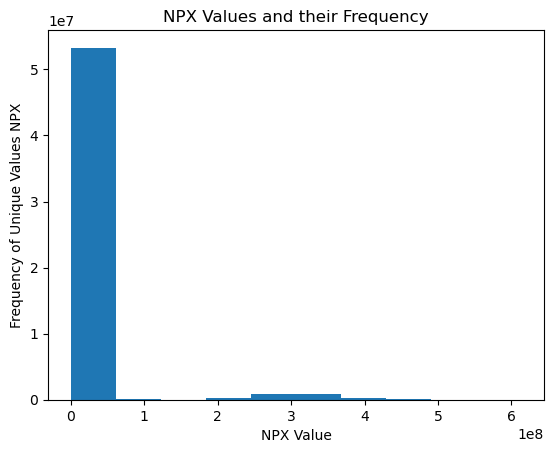

In [38]:
plt.hist(Pro_pep_clin["NPX"], bins =10)
plt.xlabel("NPX Value") # what type of number appears
plt.ylabel("Frequency of Unique Values NPX")# how many times the number appears
plt.title("NPX Values and their Frequency")
plt.show()

In [39]:
Pro_pep_clin["NPX"].head(600)

0       11254.3
1       11254.3
2       11254.3
3       11254.3
4       11254.3
         ...   
595    732430.0
596    732430.0
597    732430.0
598    732430.0
599    732430.0
Name: NPX, Length: 600, dtype: float64

In [40]:
NPX_unique=pd.DataFrame(Pro_pep_clin["NPX"].unique())
NPX_unique.shape

(218795, 1)

# ISSUE 1: Same Value Multiple Appearances!!??

WHY? Because the SAME protein is being used to look for different peptides!!
Thus the same protein appears multiple times with the same NPX Value.
Need to regraph by only counting each unique protein once!

In [41]:
# SOMETHING LIKE THIS

df = Pro_pep_clin

df= df.set_index(['patient_id','UniProt',"NPX"]).groupby(level=[0,1])
df.head(3000)

Peptide  PeptideAbundance  visit_id  \
patient_id UniProt NPX                                                  
55         O00391  11254.3  NEQEQPLGQWHLS           11254.3      55_0   
                   11254.3  NEQEQPLGQWHLS           11254.3      55_3   
                   11254.3  NEQEQPLGQWHLS           11254.3      55_6   
                   11254.3  NEQEQPLGQWHLS           11254.3      55_9   
                   11254.3  NEQEQPLGQWHLS           11254.3     55_12   
...                                   ...               ...       ...   
12931      Q13449  34843.4    AANEVSSADVK           34843.4  12931_48   
                   34843.4    AANEVSSADVK           34843.4  12931_54   
                   34843.4    AANEVSSADVK           34843.4  12931_60   
                   34843.4    AANEVSSADVK           34843.4  12931_72   
                   34843.4    AANEVSSADVK           34843.4  12931_84   

                            visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
patient_id UniProt NPX                                                        
55         O00391  11254.3            0     10.0      6.0     15.0      NaN   
                   11254.3            3     10.0      7.0     25.0      NaN   
                   11254.3            6      8.0     10.0     34.0      NaN   
                   11254.3            9      8.0      9.0     30.0      0.0   
                   11254.3           12     10.0     10.0     41.0      0.0   
...                                 ...      ...      ...      ...      ...   
12931      Q13449  34843.4           48      2.0      5.0     33.0      0.0   
                   34843.4           54      2.0      6.0     25.0      0.0   
                   34843.4           60      1.0      8.0     43.0      0.0   
                   34843.4           72      5.0      5.0     30.0      2.0   
                   34843.4           84      6.0      5.0     26.0      1.0   

                           upd23b_clinical_state_on_medication  
patient_id UniProt NPX                                          
55         O00391  11254.3                                 NaN  
                   11254.3                                 NaN  
                   11254.3                                 NaN  
                   11254.3                                  On  
                   11254.3                                  On  
...                                                        ...  
12931      Q13449  34843.4                                 Off  
                   34843.4                                  On  
                   34843.4                                  On  
                   34843.4                                  On  
                   34843.4                                 Off  

[40400416 rows x 9 columns]

# Solution 1: Get Unique Values

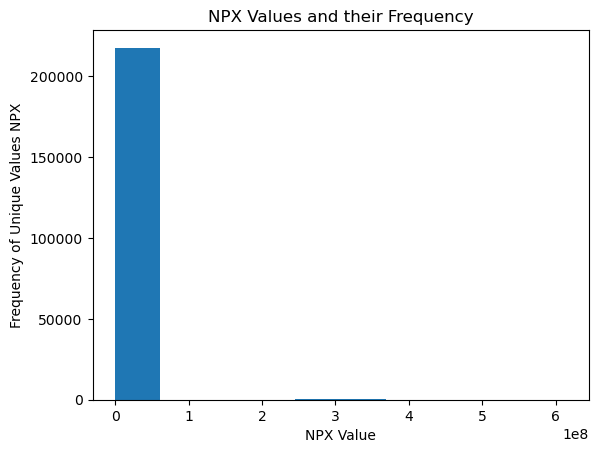

In [42]:
plt.hist(NPX_unique, bins =10)
plt.xlabel("NPX Value") # what type of number appears
plt.ylabel("Frequency of Unique Values NPX")# how many times the number appears
plt.title("NPX Values and their Frequency")
plt.show()

Still the same Layout... Theres one more issue.

In [43]:
NPX_unique.head(210353)

,0
0,11254.3
1,13163.6
2,15257.6
3,13530.8
4,732430.0
...,...
210348,2520260.0
210349,23394.6
210350,17271.2
210351,25426.3


In [44]:
print("max is", NPX_unique.max())
print("min is" , NPX_unique.min())
print( "mean is", NPX_unique.mean())

max is 0    613851000.0
dtype: float64
min is 0    84.6082
dtype: float64
mean is 0    2.856834e+06
dtype: float64


The data is EXTREMLY spread out on a large range with the min value being 84 and the max value being 61385100.
Need to zoom in on the data

# Zoom in on NPX Histogram

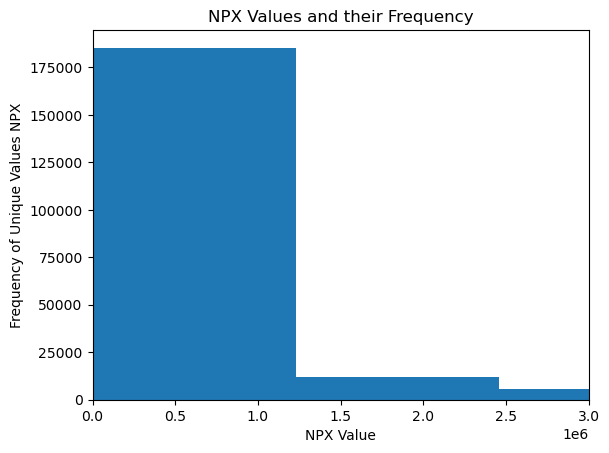

In [45]:
plt.hist(NPX_unique, bins =500)
plt.xlabel("NPX Value") # what type of number appears
plt.ylabel("Frequency of Unique Values NPX")# how many times the number appears
plt.title("NPX Values and their Frequency")
plt.xlim(0, 3000000)
plt.show()

Most of the data is within the range of 84 to 1250000 

# Continue to Graphing: Peptide Abundance

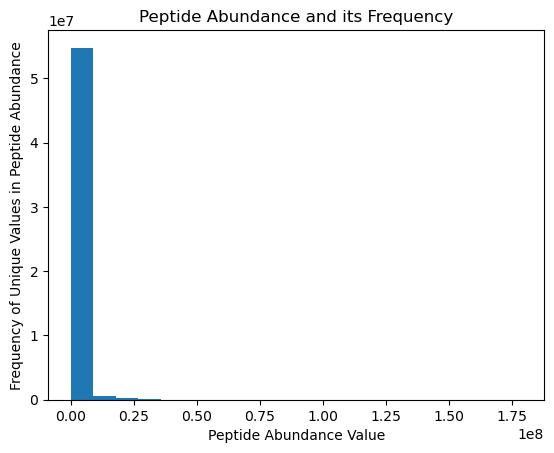

In [47]:
#percents of unique values of Peptide abundance

plt.hist(Pro_pep_clin["PeptideAbundance"], bins=20)
plt.xlabel("Peptide Abundance Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in Peptide Abundance")# how many times the number appears
plt.title("Peptide Abundance and its Frequency")
plt.show()


Seems to be the same case as NPX.
lets get unique values, min, and max and zoom in 

In [48]:
pepA_unique=pd.DataFrame(Pro_pep_clin["PeptideAbundance"].unique())
pepA_unique.shape

(738931, 1)

In [49]:
pepA_unique.min()

0    10.9985
dtype: float64

In [50]:
pepA_unique.max()

0    178752000.0
dtype: float64

In [51]:
pepA_unique.mean()

0    798078.241981
dtype: float64

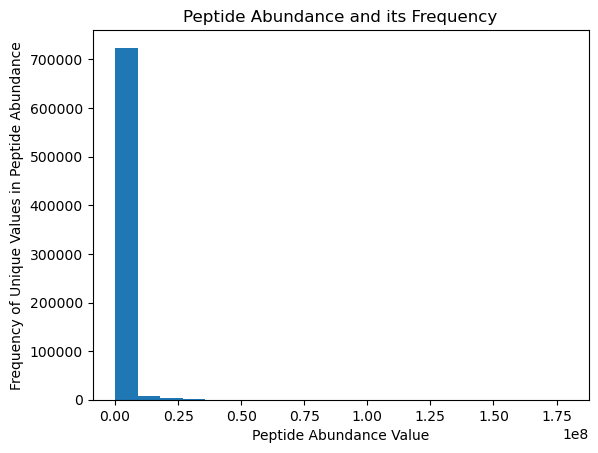

In [53]:
plt.hist(pepA_unique, bins= 20)
plt.xlabel("Peptide Abundance Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in Peptide Abundance")# how many times the number appears
plt.title("Peptide Abundance and its Frequency")
plt.show()

Doesn't really change.We still have the same issue as before that the data is too spreadout.

# Zoom in on Peptide Abundance Histogram

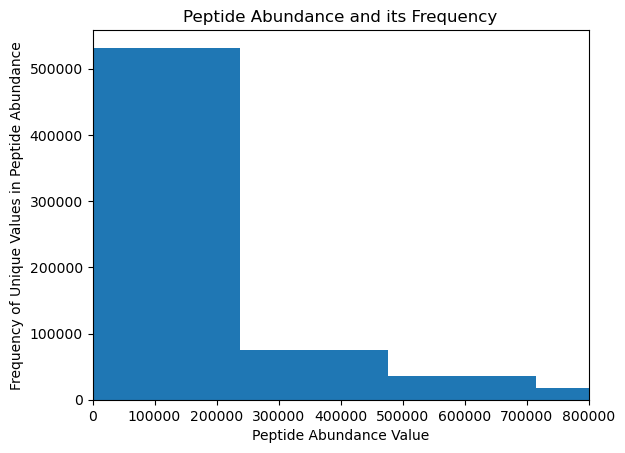

In [54]:
plt.hist(pepA_unique, bins= 750)
plt.xlabel("Peptide Abundance Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in Peptide Abundance")# how many times the number appears
plt.title("Peptide Abundance and its Frequency")
plt.xlim(-0, 800000)
plt.show()

Most of the data is from  10.99 to around 250000.
The most frequent peptide abundance can give us a clue to the peptides that may be involved with Parkinson's disease.

# Graph UPDR 1-4

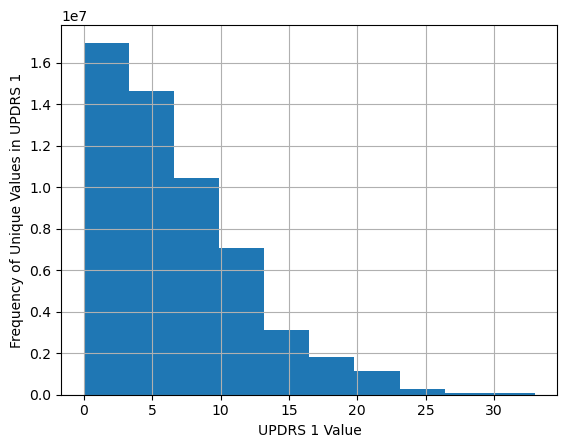

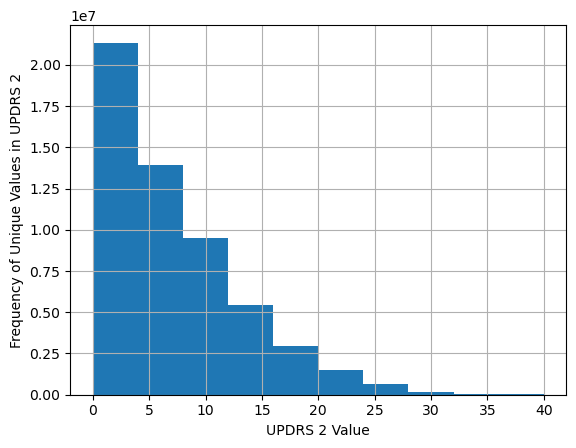

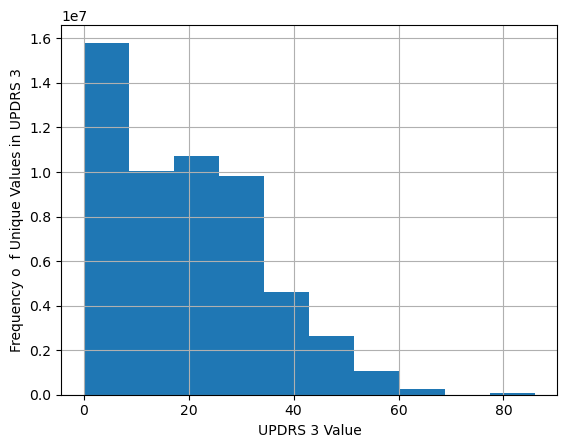

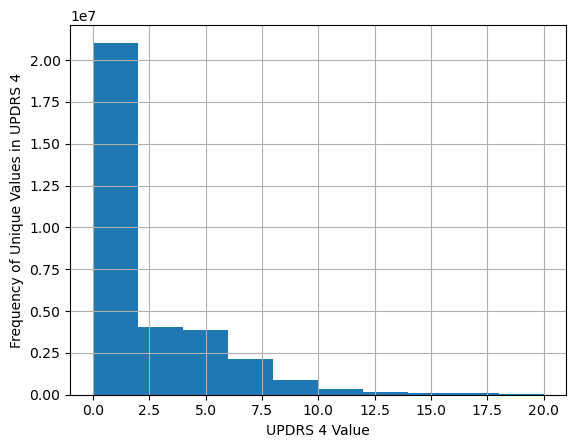

In [55]:

Pro_pep_clin["updrs_1"].hist()
plt.xlabel("UPDRS 1 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 1")# how many times the number appears
plt.show()

Pro_pep_clin["updrs_2"].hist()
plt.xlabel("UPDRS 2 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 2")# how many times the number appears
plt.show()

Pro_pep_clin["updrs_3"].hist()
plt.xlabel("UPDRS 3 Value") # what type of number appears
plt.ylabel("Frequency o  f Unique Values in UPDRS 3")# how many times the number appears
plt.show()

Pro_pep_clin["updrs_4"].dropna().hist()
plt.xlabel("UPDRS 4 Value") # what type of number appears
plt.ylabel("Frequency of Unique Values in UPDRS 4")# how many times the number appears
plt.show()



These values seem to make sense

# Min & Max Values Overview

In [56]:
#Ranges of values
Pro_pep_clin.max(numeric_only=True)

patient_id              65043.0
NPX                 613851000.0
PeptideAbundance    178752000.0
visit_month               108.0
updrs_1                    33.0
updrs_2                    40.0
updrs_3                    86.0
updrs_4                    20.0
dtype: float64

In [57]:
#Ranges of values
Pro_pep_clin.min(numeric_only=True)

patient_id          55.0000
NPX                 84.6082
PeptideAbundance    10.9985
visit_month          0.0000
updrs_1              0.0000
updrs_2              0.0000
updrs_3              0.0000
updrs_4              0.0000
dtype: float64

# Data Cleaning

In [58]:
################### DATA CLEANING #########################
#get rid of repeating data
# get rid of NA!?
# group by

# Final Data to df

In [62]:
#Categorize Data to get a better view
df = Pro_pep_clin

df_read= df.set_index(['patient_id','UniProt',"NPX","Peptide"]).groupby(level=[0,1])
df_read.head(300)

PeptideAbundance  visit_id  \
patient_id UniProt NPX     Peptide                                     
55         O00391  11254.3 NEQEQPLGQWHLS           11254.3      55_0   
                           NEQEQPLGQWHLS           11254.3      55_3   
                           NEQEQPLGQWHLS           11254.3      55_6   
                           NEQEQPLGQWHLS           11254.3      55_9   
                           NEQEQPLGQWHLS           11254.3     55_12   
...                                                    ...       ...   
12931      Q13449  34843.4 AANEVSSADVK             34843.4  12931_48   
                           AANEVSSADVK             34843.4  12931_54   
                           AANEVSSADVK             34843.4  12931_60   
                           AANEVSSADVK             34843.4  12931_72   
                           AANEVSSADVK             34843.4  12931_84   

                                          visit_month  updrs_1  updrs_2  \
patient_id UniProt NPX     Peptide                                        
55         O00391  11254.3 NEQEQPLGQWHLS            0     10.0      6.0   
                           NEQEQPLGQWHLS            3     10.0      7.0   
                           NEQEQPLGQWHLS            6      8.0     10.0   
                           NEQEQPLGQWHLS            9      8.0      9.0   
                           NEQEQPLGQWHLS           12     10.0     10.0   
...                                               ...      ...      ...   
12931      Q13449  34843.4 AANEVSSADVK             48      2.0      5.0   
                           AANEVSSADVK             54      2.0      6.0   
                           AANEVSSADVK             60      1.0      8.0   
                           AANEVSSADVK             72      5.0      5.0   
                           AANEVSSADVK             84      6.0      5.0   

                                          updrs_3  updrs_4  \
patient_id UniProt NPX     Peptide                           
55         O00391  11254.3 NEQEQPLGQWHLS     15.0      NaN   
                           NEQEQPLGQWHLS     25.0      NaN   
                           NEQEQPLGQWHLS     34.0      NaN   
                           NEQEQPLGQWHLS     30.0      0.0   
                           NEQEQPLGQWHLS     41.0      0.0   
...                                           ...      ...   
12931      Q13449  34843.4 AANEVSSADVK       33.0      0.0   
                           AANEVSSADVK       25.0      0.0   
                           AANEVSSADVK       43.0      0.0   
                           AANEVSSADVK       30.0      2.0   
                           AANEVSSADVK       26.0      1.0   

                                         upd23b_clinical_state_on_medication  
patient_id UniProt NPX     Peptide                                            
55         O00391  11254.3 NEQEQPLGQWHLS                                 NaN  
                           NEQEQPLGQWHLS                                 NaN  
                           NEQEQPLGQWHLS                                 NaN  
                           NEQEQPLGQWHLS                                  On  
                           NEQEQPLGQWHLS                                  On  
...                                                                      ...  
12931      Q13449  34843.4 AANEVSSADVK                                   Off  
                           AANEVSSADVK                                    On  
                           AANEVSSADVK                                    On  
                           AANEVSSADVK                                    On  
                           AANEVSSADVK                                   Off  

[12349055 rows x 8 columns]

In [60]:
#Find missing NA values
NA_sum=df.isnull().sum()
percent= NA_sum/941744
missing = pd.concat([df.isnull().sum(), 100 * percent], axis=1)

missing.columns=["Count", "%"]
missing.sort_values(by= ["Count", "%"], ascending = False)


,Count,%
upd23b_clinical_state_on_medication,27985990,2971.719491
updrs_4,22947540,2436.706791
updrs_3,608947,64.661628
updrs_2,51778,5.498097
updrs_1,8100,0.860106
patient_id,0,0.000000
UniProt,0,0.000000
NPX,0,0.000000
Peptide,0,0.000000
PeptideAbundance,0,0.000000


# Capstone 2 Step 3: Start

# Conclusion: UPDR 1-4 and medication has many missing values
Remove NA from df

In [63]:
df.head()

,patient_id,UniProt,NPX,Peptide,PeptideAbundance,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_0,0,10.0,6.0,15.0,NaN,NaN
1,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_3,3,10.0,7.0,25.0,NaN,NaN
2,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_6,6,8.0,10.0,34.0,NaN,NaN
3,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_9,9,8.0,9.0,30.0,0.0,On
4,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_12,12,10.0,10.0,41.0,0.0,On


In [64]:
#Remove NA values and Name df1
df1=df.dropna()


In [65]:
#Check for NA
df1.isna().sum()

patient_id                             0
UniProt                                0
NPX                                    0
Peptide                                0
PeptideAbundance                       0
visit_id                               0
visit_month                            0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

In [66]:
df.shape

(55647950, 12)

In [67]:
df1.shape

(27082410, 12)

Went from 941744 values to 381841

# Graph Data to See Correlations

# Heat Map 

In [68]:
import seaborn as sns

In [69]:
subset=df1[['NPX','PeptideAbundance','updrs_1', 'updrs_2','updrs_3','updrs_4']]

<AxesSubplot:>

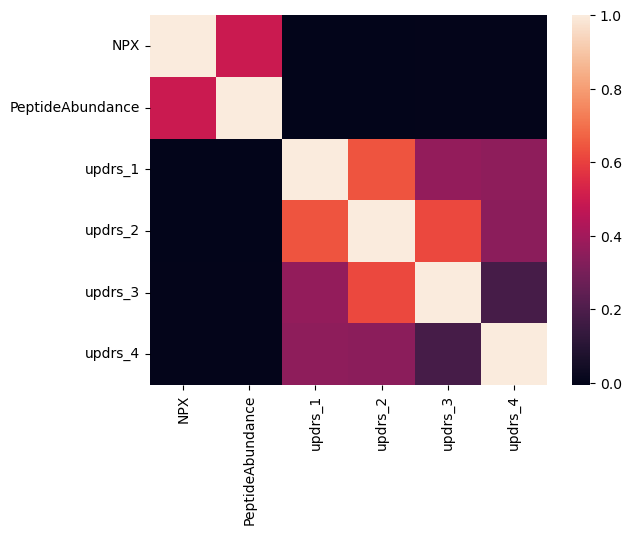

In [70]:
# Make a heatmap of the data 
corr= subset.corr()
sns.heatmap(corr)

NPX& peptideAbundance have a high correlation to UPDRS1-4

Heat map doesnt seem to work so: maybe try random forest

# Plotting Data:UPDRS

In [ ]:
#Look at dataframe
f1.head()

In [ ]:
#look at patient ids
df1["patient_id"].unique()

In [90]:
#Plot data for several patients
#clin_Cond1
plot_df = clin_Cond1[clin_Cond1["patient_id"]==1517]

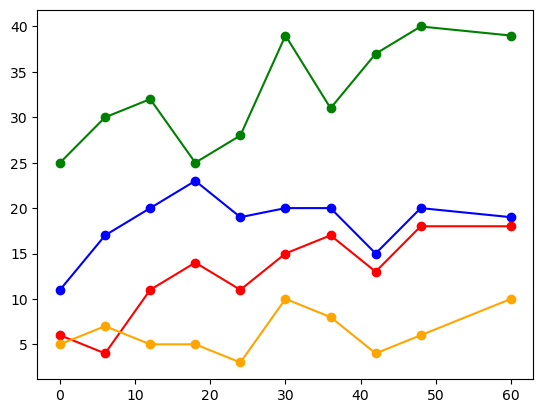

In [91]:
#Subplot: CSV Before Merge
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")

In [ ]:
#Pro_pep_clin: CSV After Merge

In [18]:

plot_df = Pro_pep_clin[Pro_pep_clin["patient_id"]==1517]

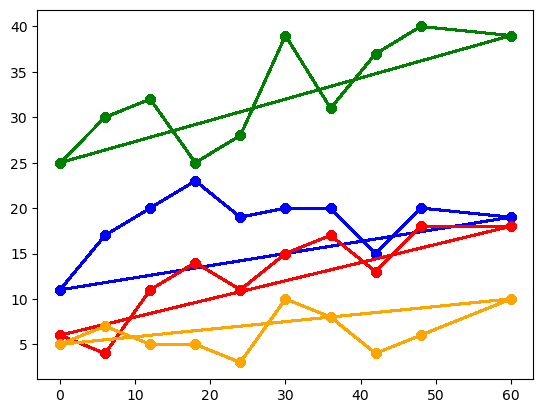

In [19]:
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")

Some data seems to be missing. 
 try merging again

The graph is better but something is up!
lets try merging data again

In [72]:
#After Merge and Removal of Na values

In [73]:
plot_df = df1[df1["patient_id"]==1517]

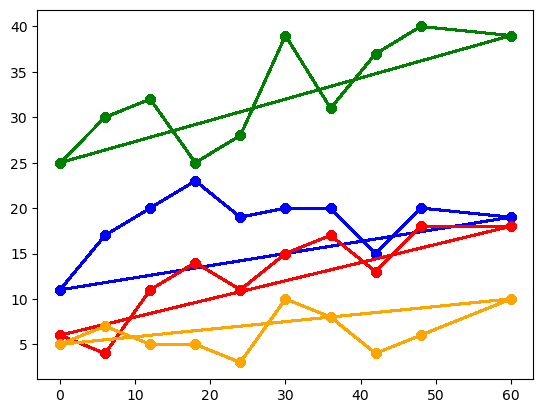

In [74]:
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")